In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-dataset/revenue_target.xlsx
/kaggle/input/credit-card-dataset/revenue_target.csv
/kaggle/input/credit-card-dataset/credit_2018_2019.xlsx
/kaggle/input/credit-card-dataset/cost.xlsx


In [2]:
import pandas as pd

In [3]:
revenue_target_csv = pd.read_csv("/kaggle/input/credit-card-dataset/revenue_target.csv")
credit_xlsx = pd.ExcelFile('/kaggle/input/credit-card-dataset/credit_2018_2019.xlsx')
finance_csv = pd.read_excel(credit_xlsx, "Finance_all")
info_csv = pd.read_excel(credit_xlsx, "info_all")
cost_csv = pd.read_excel('/kaggle/input/credit-card-dataset/cost.xlsx')

In [4]:
print(finance_csv)

        CLIENTNUM     Attrition_Flag  Year Quarter     Date  Type  \
0       708082083  Existing Customer  2018      Q1  Q1,2018  Shop   
1       708083283  Attrited Customer  2018      Q1  Q1,2018  Shop   
2       708084558  Attrited Customer  2018      Q1  Q1,2018  Shop   
3       708085458  Existing Customer  2018      Q1  Q1,2018  Shop   
4       708086958  Existing Customer  2018      Q1  Q1,2018  Shop   
...           ...                ...   ...     ...      ...   ...   
306871  721164483  Existing Customer  2019      Q4  Q4,2019  Cash   
306872  708095133  Existing Customer  2019      Q4  Q4,2019  Cash   
306873  900202780  Existing Customer  2019      Q4  Q4,2019  Cash   
306874  779770683  Existing Customer  2019      Q4  Q4,2019  Cash   
306875  709632483  Existing Customer  2019      Q4  Q4,2019  Cash   

        Trans_Amount   Revenue  
0           120.1200   2.40240  
1           135.5550   2.71110  
2           396.2700   7.92540  
3           122.9550   2.45910  
4     

# Group data by year and quarter

In [5]:
year_quarter_group = revenue_target_csv.groupby(["Year", "quarter"])

# Target Revenue by year and quarter

In [6]:
print(year_quarter_group.agg({'Target Revenue': ['sum']}))

             Target Revenue
                        sum
Year quarter               
2018 Q1       706658.560875
     Q2       308857.125385
     Q3       307651.000750
     Q4       899100.268875
2019 Q1       465822.186468
     Q2       277417.456255
     Q3       222554.549345
     Q4       593694.381885


In [7]:
target_revenue_by_quarter = year_quarter_group.agg('sum')

<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='Year,quarter'>

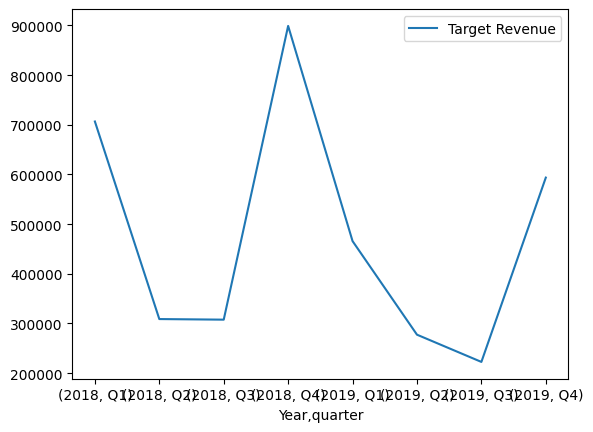

In [8]:
print(type(target_revenue_by_quarter))
target_revenue_by_quarter.plot(y='Target Revenue')